# Example: **Linear Regression in Python**
Suppose we want to know if the number of hours spent studying and the number of prep exams taken affects the score that a student receives on a certain exam.

To explore this relationship, we can perform the following steps in Python to conduct a multiple linear regression.

# Step 1: **Enter the data.**

First, we’ll create a pandas DataFrame to hold our dataset:

In [2]:
import pandas as pd

#create data
data = pd.DataFrame({'hours': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4, 3, 6, 5, 3, 4, 6, 2, 1, 2],
                   'exams': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4, 3, 2, 4, 4, 4, 5, 1, 0, 1],
                   'score': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96, 90, 82, 85, 99, 83, 62, 76]})

data

,hours,exams,score
0,1,1,76
1,2,3,78
2,2,3,85
3,4,5,88
4,2,2,72
5,1,2,69
6,5,1,94
7,4,1,94
8,2,0,88
9,4,3,92


# Step 2: **Perform Linear Regression.**

Next, we’ll use the [OLS() function](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html) from the statsmodels library to perform ordinary least squares regression, using “hours” and “exams” as the predictor variables and “score” as the response variable:

In [3]:
import statsmodels.api as sm

#define Predicted variable
y = data['score']

#define predictor variables
x = data[['hours', 'exams']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     23.46
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.29e-05
Time:                        19:06:05   Log-Likelihood:                -60.354
No. Observations:                  20   AIC:                             126.7
Df Residuals:                      17   BIC:                             129.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6735      2.816     24.033      0.0

#Step 3: **Interpret the results.**

Here is how to interpret the most relevant numbers in the output:

**R-squared**: **0.734.** This is known as the **coefficient of determination**. It is the *proportion of the variance* in the response variable that can be explained by the predictor variables. In this example, **73.4%** of the variation in the *exam scores* can be explained by the ** number of hours** studied and the number of prep exams taken.

**F-statistic:** 23.46. This is the overall F-statistic for the regression model.

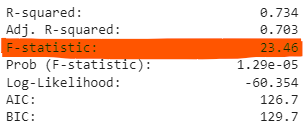


**Prob (F-statistic)**: **1.29e-05.** This is the p-value associated with the overall F-statistic.  It tells us whether or not the regression model as a whole is statistically significant.

In other words, it tells us if the two predictor variables combined have a statistically significant association with the response variable. In this case the p-value is less than 0.05, which indicates that the predictor variables “hours studied” and “prep exams taken” combined have a statistically significant association with exam score.


**coef:** The coefficients for each predictor variable tell us the average expected change in the response variable, assuming the other predictor variable remains constant. For example, for each additional hour spent studying, the average exam score is expected to increase by 5.56, assuming that prep exams taken remains constant.

Here’s another way to think about this: If student A and student B both take the same amount of prep exams but student A studies for one hour more, then student A is expected to earn a score that is 5.56 points higher than student B.

We interpret the coefficient for the intercept to mean that the expected exam score for a student who studies zero hours and takes zero prep exams is 67.67.


**P>|t|.** The individual *p-values* tell us whether or not each predictor variable is statistically significant. We can see that *“hours”* is statistically significant (**p = 0.00)** while *“exams”* **(p = 0.52)** is not statistically significant at α = 0.05. Since “exams” is not statistically significant, we may end up deciding to remove it from the model.


**Estimated regression equation:** We can use the coefficients from the output of the model to create the following estimated regression equation:

**exam score = 67.67 + 5.56*(hours) – 0.60*(prep exams)**

We can use this estimated regression equation to calculate the expected exam score for a student, based on the number of hours they study and the number of prep exams they take. For example, a student who studies for three hours and takes one prep exam is expected to receive a score of 83.75:

Keep in mind that because prep exams taken was not statistically significant (p = 0.52), we may decide to remove it because it doesn’t add any improvement to the overall model. In this case, we could perform simple linear regression using only hours studied as the predictor variable.